In [4]:
cd /mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/day4/

/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/day4


# Persistent Homology Analyses of HCP fMRI Data

## Overview

In [5]:
# (blah)

## Setup

Define some variables

In [6]:
data_dir = '/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/day3'
rest_pts_file = data_dir + '/rfMRI_REST1_LR_Atlas_hp2000_clean_Gordon333.ptseries.nii'
lang_pts_file = data_dir + '/tfMRI_LANGUAGE_LR_Atlas_Gordon333.ptseries.nii'
mot_pts_file = data_dir + '/tfMRI_MOTOR_LR_Atlas_Gordon333.ptseries.nii'

In [7]:
subs_file = 'HCP_900_subslist.txt'
subs = [s[:-1] for s in open(subs_file, 'r').readlines()]

Importage

In [8]:

# Generic imports
import os,sys,glob,numpy as np,pandas as pd

# Neuroimaging stuff
import nibabel as nib

# Visualization stuff
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


## Load and prepare data

Load in gifti files and put into pandas dataframes

In [109]:
rest_pts_img = nib.gifti.giftiio.read(rest_pts_file)
rest_pts_dat = np.squeeze(rest_pts_img.get_data())
df_rest_pts_dat = pd.DataFrame(rest_pts_dat)

lang_pts_img = nib.gifti.giftiio.read(lang_pts_file)
lang_pts_dat = np.squeeze(lang_pts_img.get_data())
df_lang_pts_dat = pd.DataFrame(lang_pts_dat)

mot_pts_img = nib.gifti.giftiio.read(mot_pts_file)
mot_pts_dat = np.squeeze(mot_pts_img.get_data())
df_mot_pts_dat = pd.DataFrame(mot_pts_dat)

/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class '

Put into dataframes and compute correlations

In [110]:
df_rest_pts_dat = pd.DataFrame(rest_pts_dat)
df_lang_pts_dat = pd.DataFrame(lang_pts_dat)
df_mot_pts_dat = pd.DataFrame(mot_pts_dat)

Compute FC matrices

In [111]:
df_rest_pts_dat_corr = df_rest_pts_dat.corr()
df_lang_pts_dat_corr = df_lang_pts_dat.corr()
df_mot_pts_dat_corr = df_mot_pts_dat.corr()

Write FC matrices to .csv files

In [95]:
df_rest_pts_dat_corr.to_csv(data_dir + '/df_rest_pts_dat_corr.csv', header=None)
df_lang_pts_dat_corr.to_csv(data_dir + '/df_lang_pts_dat_corr.csv', header=None)
df_mot_pts_dat_corr.to_csv(data_dir + '/df_mot_pts_dat_corr.csv', header=None)

## Visualize the data

ROI time series

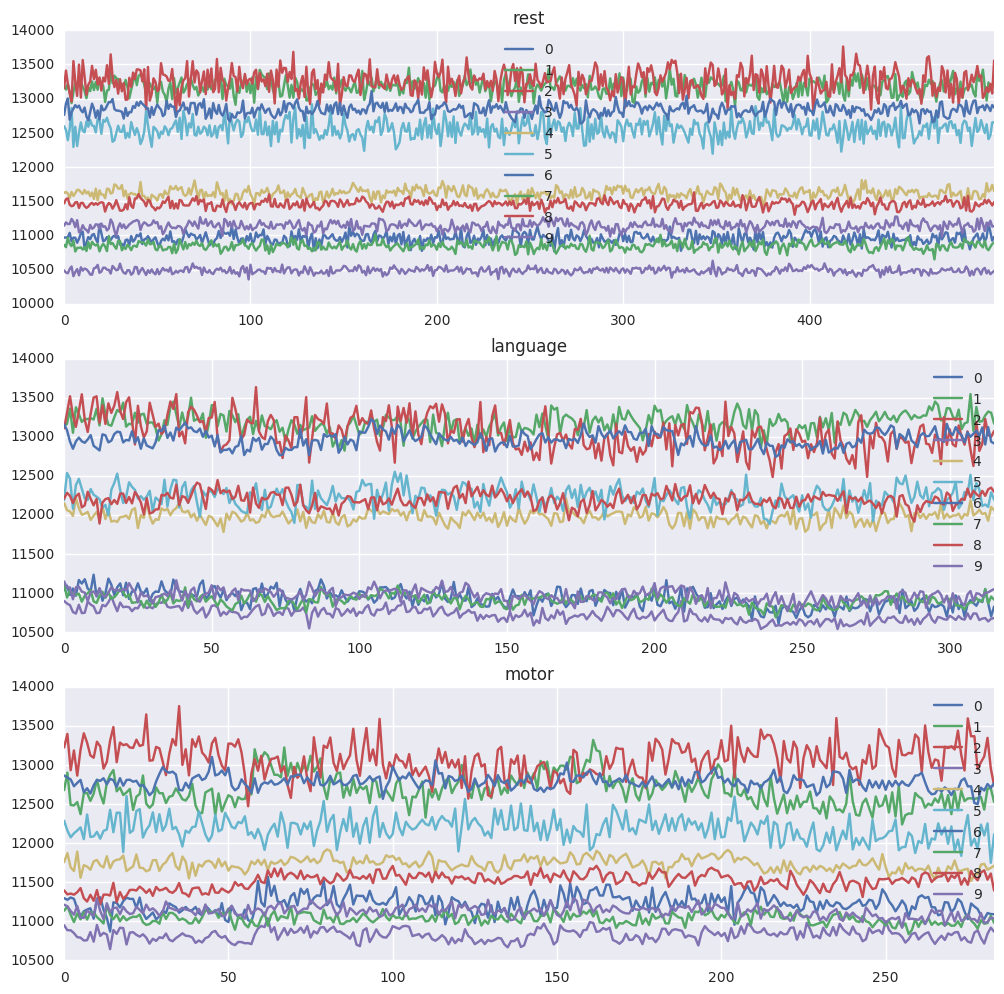

In [94]:
fig, ax = plt.subplots(nrows=3,figsize=(12,12))



df_rest_pts_dat.iloc[:500,:10].plot(ax=ax[0], title='rest')
df_lang_pts_dat.iloc[:500,:10].plot(ax=ax[1], title='language')
df_mot_pts_dat.iloc[:500,:10].plot(ax=ax[2], title='motor')



FC matrices

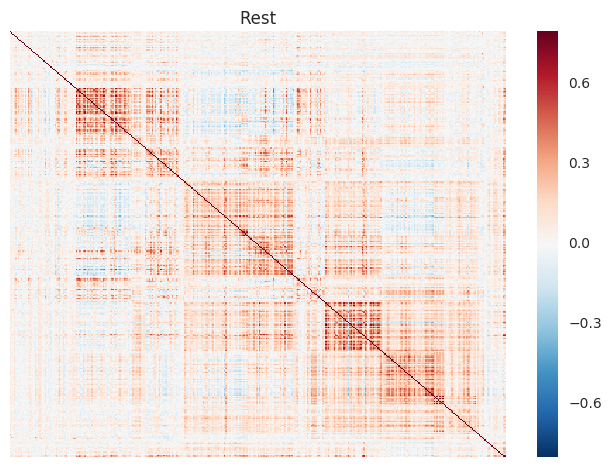

In [49]:
fig, ax = plt.subplots()
sns.heatmap(df_rest_pts_dat_corr,xticklabels='',yticklabels='',axes=ax,vmin=-0.8,vmax=0.8)
ax.set_title('Rest')

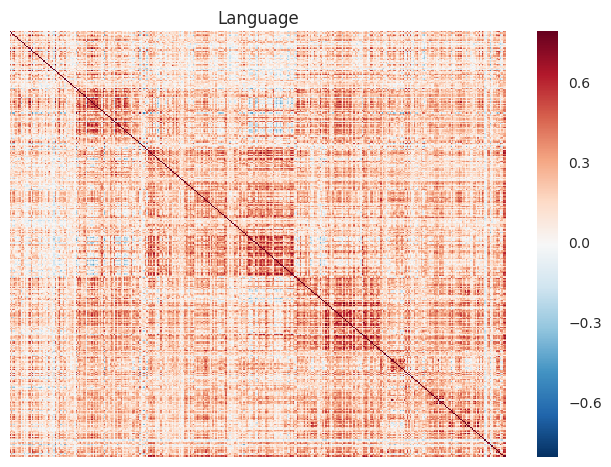

In [48]:
fig, ax = plt.subplots()
sns.heatmap(df_lang_pts_dat_corr,xticklabels='',yticklabels='',axes=ax,vmin=-0.8,vmax=0.8)
ax.set_title('Language')

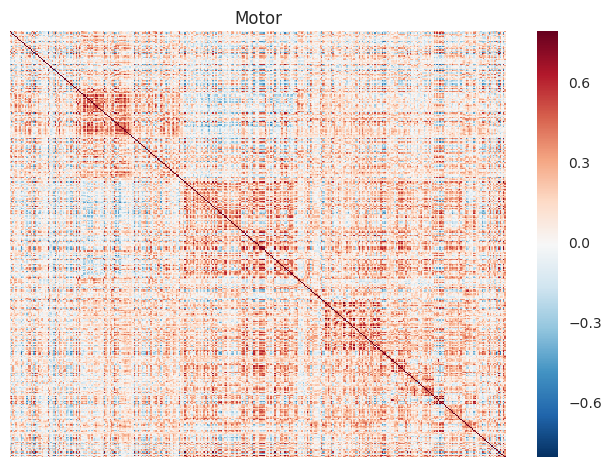

In [47]:
fig, ax = plt.subplots()
sns.heatmap(df_mot_pts_dat_corr,xticklabels='',yticklabels='',axes=ax,vmin=-0.8,vmax=0.8)
ax.set_title('Motor')

## Dynamic FC matrices

In [ ]:
wl = 100
centres = np.arange(100,1200,100)
wins = [np.arange(c-100,c+100) for c in centres]

_corrs = {}
for w_it,w in enumerate(wins):
    _corrs[w_it] = pd.DataFrame(np.corrcoef(df_rest_pts_dat.ix[w].values.T))
df_rest_pts_rollcorr = pd.concat(_corrs)
df_rest_pts_rollcorr.index.names = ['win', 'node']
df_rest_pts_rollcorr.columns.names = ['node']

In [151]:
wl = 100
centres = np.arange(100,200)
wins = [np.arange(c-100,c+100) for c in centres]

_corrs = {}
for w_it,w in enumerate(wins):
    _corrs[w_it] = pd.DataFrame(np.corrcoef(df_lang_pts_dat.ix[w].values.T))
df_lang_pts_rollcorr = pd.concat(_corrs)
df_lang_pts_rollcorr.index.names = ['win', 'node']
df_lang_pts_rollcorr.columns.names = ['node']

In [152]:
df_mot_pts_dat.shape

(284, 352)

In [153]:
wl = 100
centres = np.arange(100,200)
wins = [np.arange(c-100,c+100) for c in centres]

_corrs = {}
for w_it,w in enumerate(wins):
    _corrs[w_it] = pd.DataFrame(np.corrcoef(df_mot_pts_dat.ix[w].values.T))
df_mot_pts_rollcorr = pd.concat(_corrs)
df_mot_pts_rollcorr.index.names = ['win', 'node']
df_mot_pts_rollcorr.columns.names = ['node']

In [165]:
ccs = {}
for w in range(len(wins)):
    for ww in range(w,len(wins)):
        corr = np.corrcoef(df_mot_pts_rollcorr.ix[w].values.ravel(),df_mot_pts_rollcorr.ix[ww].values.ravel())
        ccs[w,ww] = corr
        
ccs_mot = np.zeros([len(wins),len(wins)])
for (_row,_col),val in ccs.items():
    ccs_mot[_row,_col] = val
df_ccs_mot  = pd.DataFrame(ccs_mot + ccs_mot.T)

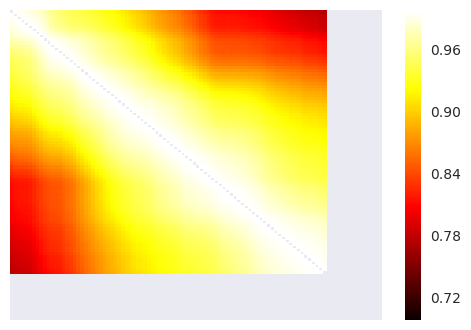

In [194]:
sns.heatmap(df_ccs_mot,xticklabels='',yticklabels='',
            mask=np.eye(ccs_mot.shape[0]),vmin=0.7,vmax=1,cmap='hot')

In [ ]:
ccs = {}
for w in range(len(wins)):
    for ww in range(w,len(wins)):
        corr = np.corrcoef(df_rest_pts_rollcorr.ix[w].values.ravel(),df_rest_pts_rollcorr.ix[ww].values.ravel())
        ccs[w,ww] = corr
        
ccs_rest = np.zeros([len(wins),len(wins)])
for (_row,_col),val in ccs.items():
    ccs_rest[_row,_col] = val
df_ccs_rest  = pd.DataFrame(ccs_rest + ccs_rest.T)

## TDA analysis

Compute persistent homology on FC matrices

In [9]:
fs = glob.glob('*rest*corr.csv') + glob.glob('*wm*corr.csv') + glob.glob('*rel*corr.csv')

In [10]:
len(fs)

2642

In [11]:
scriptlines = """

include("/home/jgriffiths/Software/Eirene0_3_5/Eirene0_3_5.jl") \n
include("banff_spring2017.jl") \n
pathin = "<IN_FILE>" \n
pathout = "<OUT_FILE>" \n
johnsfunction_banff2017(pathin, pathout) \n


""" 

In [13]:
run_script_file = 'run_johnsfunction.jl'

for f in fs:
    in_file = f
    out_file = in_file.replace('.csv', '_pdxy.csv')
        
    if not os.path.isfile(out_file):
        
        newtxt = scriptlines.replace('<IN_FILE>',in_file)\
                            .replace('<OUT_FILE>',out_file)
        open(run_script_file, 'w').write(newtxt)
        
        os.system('/home/jgriffiths/Software/julia/julia-f4c6c9d4bb/bin/julia %s' %run_script_file)
    

In [243]:
cat $run_script_file



include("/home/jgriffiths/Software/Eirene0_3_5/Eirene0_3_5.jl") 

include("banff_spring2017.jl") 

pathin = "101915_rest_corr.csv" 

pathout = "101915_rest_corr_pdxy.csv" 

johnsfunction_banff2017(pathin, pathout) 





Visualize 10 subjects' rest, language, wm

In [298]:
fs = glob.glob('*_pdxy.csv')

len(fs)

subs_to_do = subs[:10]

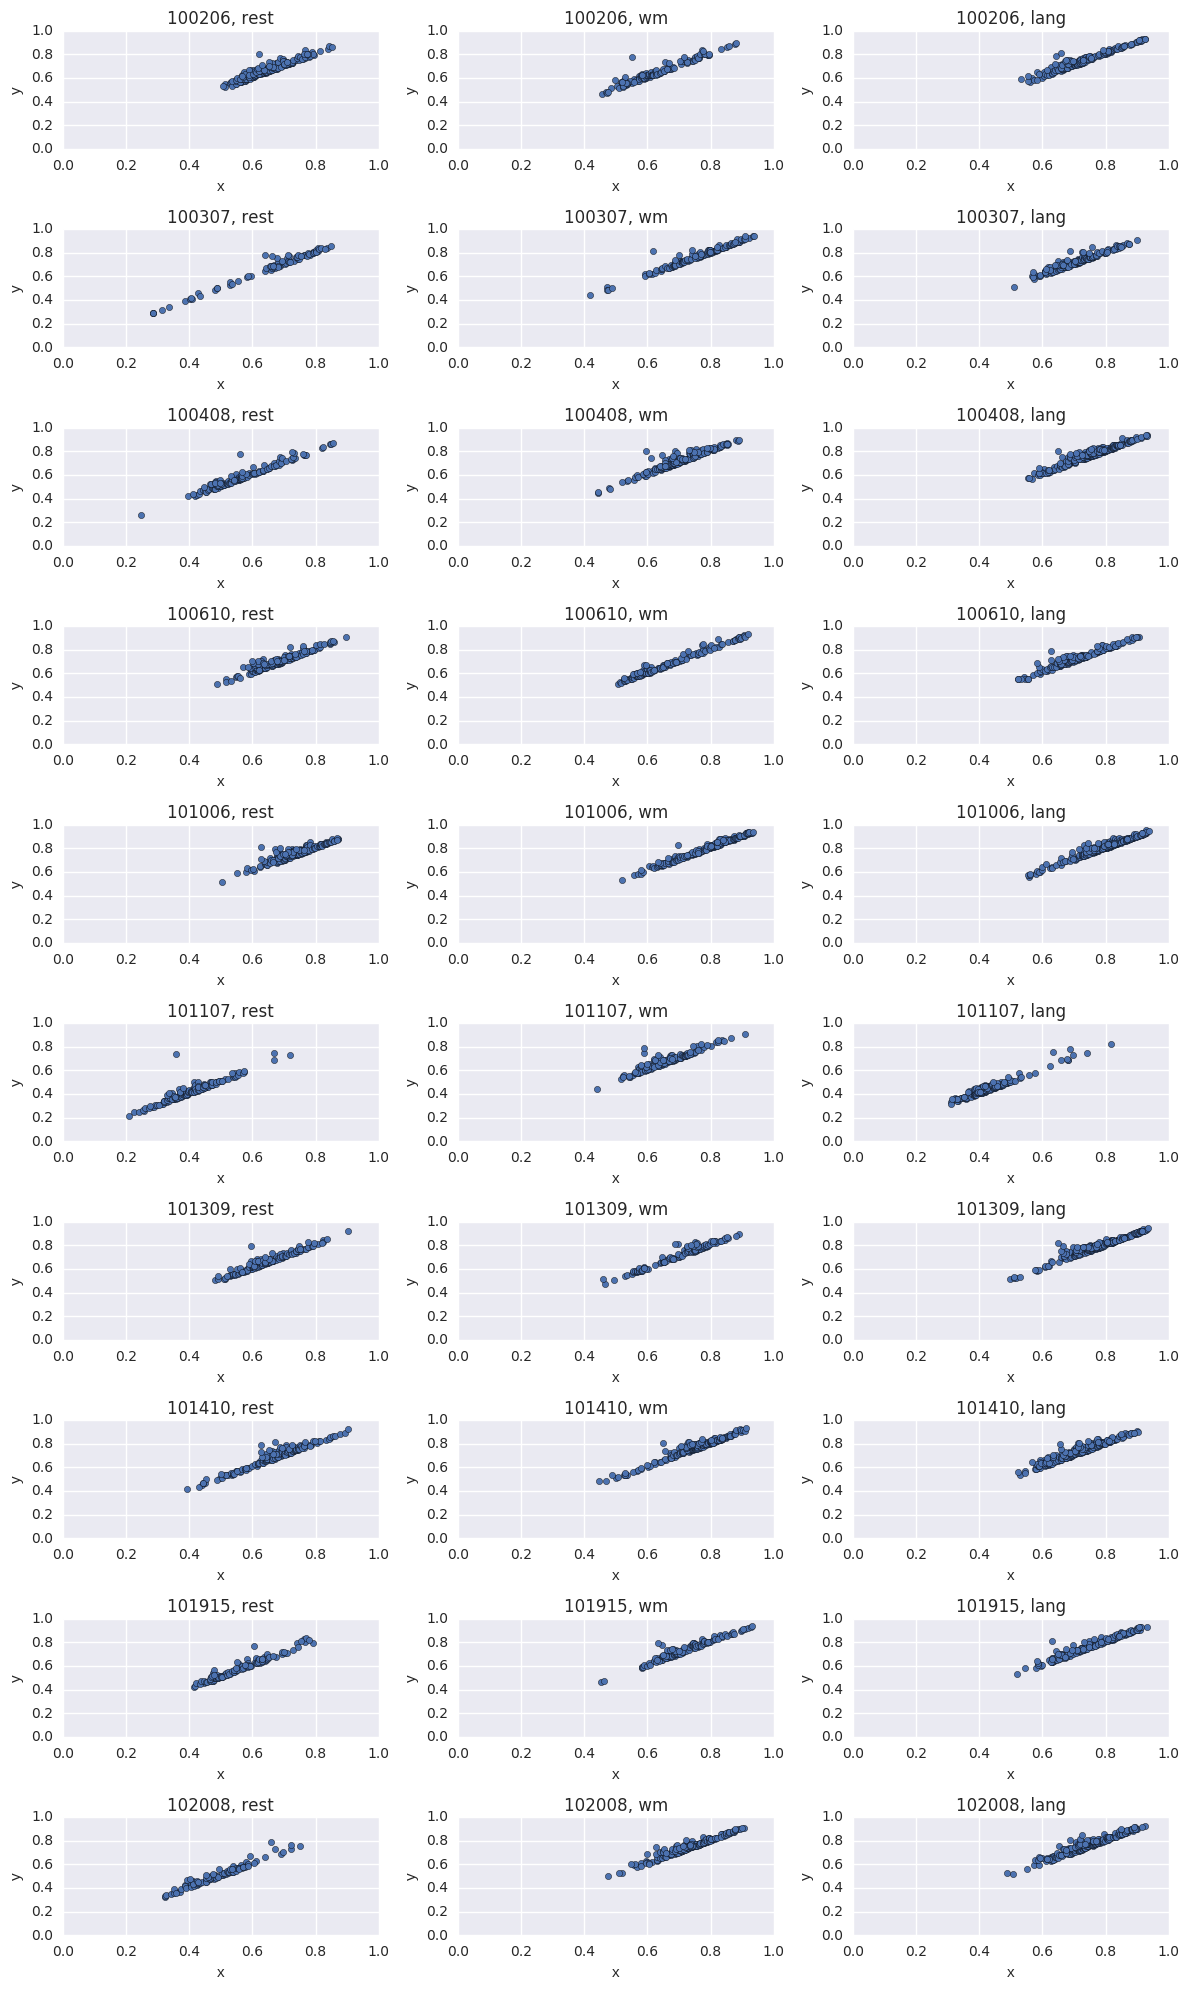

In [293]:
subs_to_do = subs[:10]

fig, ax = plt.subplots(ncols=3,nrows=10,figsize=(12,20))

rest_dfs,wm_dfs,lang_dfs = {},{},{}

for sub_it,sub in enumerate(subs_to_do):
    
    task = 'rest'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    df.plot(kind='scatter', x='x', y='y',ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    rest_dfs[sub,task] = df
    
    task = 'wm'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][1] # a = ax.ravel()[sub_it][1]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    df.plot(kind='scatter', x='x', y='y',ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    wm_dfs[sub,task] = df
    
    task = 'lang'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][2] # a = ax.ravel()[sub_it][1]    
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    df.plot(kind='scatter', x='x', y='y',ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    lang_dfs[sub,task] = df
    
plt.tight_layout()

Aggregated persistence diagrams over all subjects

In [14]:
rest_fs = [f for f in glob.glob('*_pdxy.csv') if 'rest' in f]
rest_allxys = np.concatenate([pd.read_csv(f,header=None).values for f in rest_fs],axis=0)

In [15]:
lang_fs = [f for f in glob.glob('*_pdxy.csv') if 'lang' in f]
lang_allxys = np.concatenate([pd.read_csv(f,header=None).values for f in lang_fs],axis=0)

In [16]:
wm_fs = [f for f in glob.glob('*_pdxy.csv') if 'wm' in f]
wm_allxys = np.concatenate([pd.read_csv(f,header=None).values for f in wm_fs],axis=0)

In [19]:
df_rest_allxys = pd.DataFrame(rest_allxys, columns=['x', 'y'])
df_wm_allxys = pd.DataFrame(wm_allxys, columns=['x', 'y'])
df_lang_allxys = pd.DataFrame(lang_allxys, columns=['x', 'y'])

In [17]:
len(rest_fs)

898

In [320]:
len(lang_fs)

849

In [18]:
len(wm_fs)

898

In [20]:
df_rest_allxys.shape

(86729, 2)

In [21]:
df_lang_allxys.shape

(150128, 2)

In [22]:
df_wm_allxys.shape

(182746, 2)

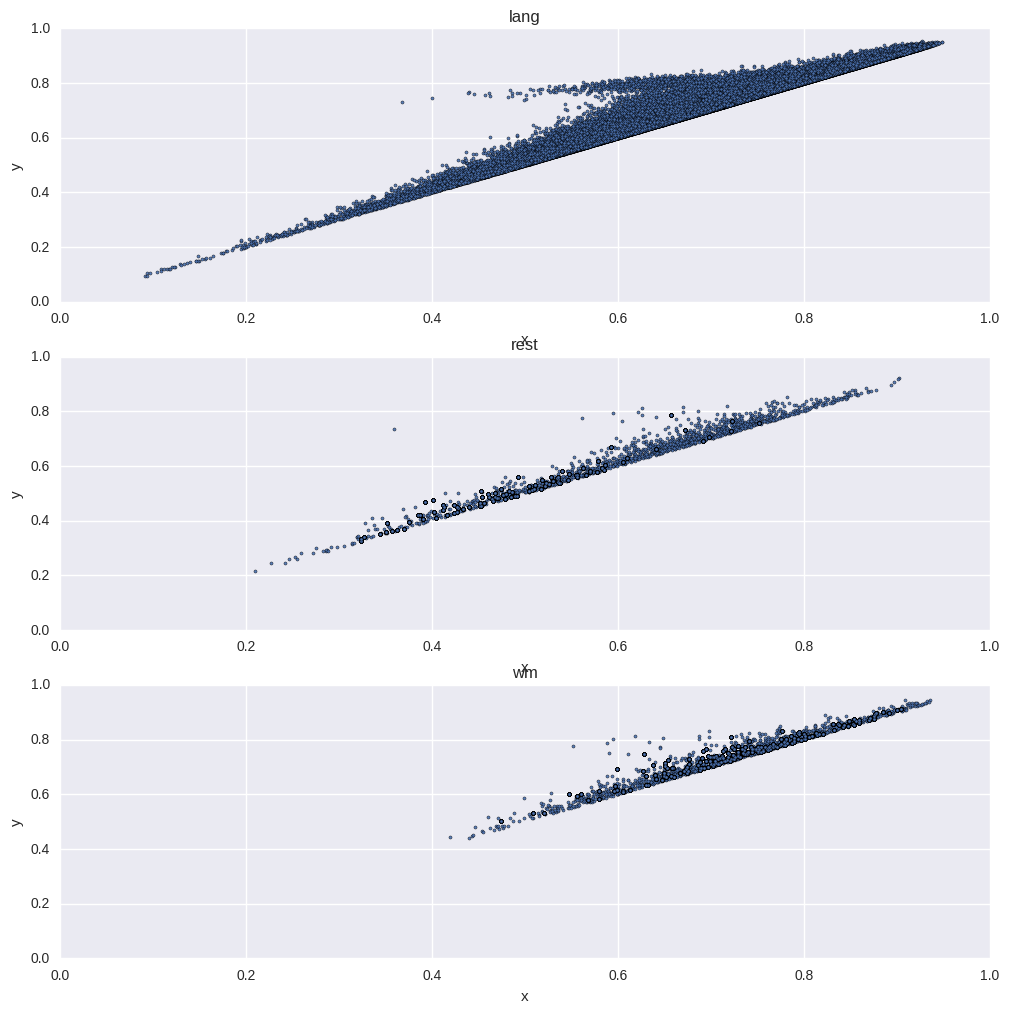

In [23]:
fig, ax = plt.subplots(nrows=3,figsize=(12,12))

df_lang_allxys.plot(kind='scatter', x='x', y='y',ax=ax[0], title='lang',
                    alpha=0.9,s=5,xlim=[0,1],ylim=[0,1])

df_rest_allxys.plot(kind='scatter', x='x', y='y',ax=ax[1], title='rest',
                    alpha=0.9,s=5,xlim=[0,1],ylim=[0,1])

df_wm_allxys.plot(kind='scatter', x='x', y='y',ax=ax[2],title='wm',
                  alpha=0.9,s=5,xlim=[0,1], ylim=[0,1])


#sns.jointplot(data=df_rest_allxys,x='x',y='y',xlim=[0,1],ylim=[0,1])# annotate=False)
#sns.jointplot(data=df_lang_allxys,x='x',y='y',xlim=[0,1], ylim=[0,1])
#sns.jointplot(data=df_wm_allxys,x='x',y='y',xlim=[0,1], ylim=[0,1])

In [30]:
# presistences (death - birth)
df_rest_pers = df_rest_allxys['y'] - df_rest_allxys['x']
df_lang_pers = df_lang_allxys['y'] - df_lang_allxys['x']
df_wm_pers = df_wm_allxys['y'] - df_wm_allxys['x']

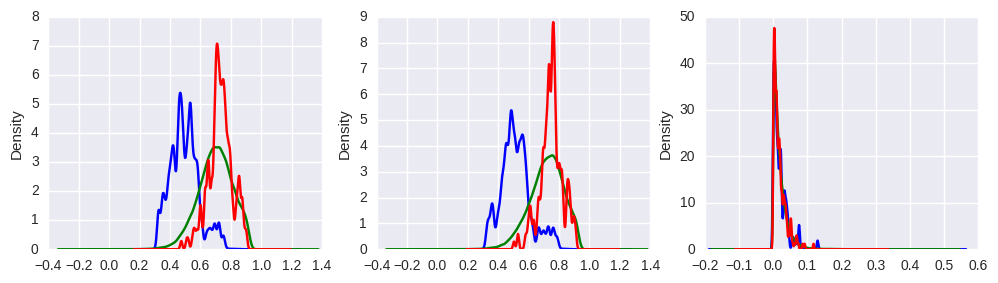

In [31]:
#fig, ax = plt.subplots(ncols=2,nrows=3,figsize=(12,12))

#sns.distplot(df_rest_allxys['x'],ax=ax[0][0]); ax[0][0].set_title('rest births'); ax[0][0].set_xlim([0,1])
#sns.distplot(df_lang_allxys['x'],ax=ax[1][0]); ax[1][0].set_title('lang births'); ax[1][0].set_xlim([0,1])
#sns.distplot(df_wm_allxys['x'],ax=ax[2][0]); ax[2][0].set_title('wm births'); ax[2][0].set_xlim([0,1])

#sns.distplot(df_rest_allxys['y'],ax=ax[0][1]); ax[0][1].set_title('rest deaths'); ax[0][1].set_xlim([0,1])
#sns.distplot(df_lang_allxys['y'],ax=ax[1][1]); ax[1][1].set_title('lang deaths'); ax[1][1].set_xlim([0,1])
#sns.distplot(df_wm_allxys['y'],ax=ax[2][1]); ax[2][1].set_title('wm deaths'); ax[2][1].set_xlim([0,1])
#fig, ax = plt.subplots()
#sns.distplot(df_rest_allxys['x'],ax=ax,color='b')
#sns.distplot(df_lang_allxys['x'],ax=ax,color='g')
#sns.distplot(df_wm_allxys['x'],ax=ax,color='r')


# blue = rest; green = lang; red = wm

fig, ax = plt.subplots(ncols=3,figsize=(12,3))

df_rest_allxys['x'].plot(kind='kde', ax=ax[0],color='b')
df_lang_allxys['x'].plot(kind='kde', ax=ax[0],color='g')
df_wm_allxys['x'].plot(kind='kde', ax=ax[0],color='r')

df_rest_allxys['y'].plot(kind='kde', ax=ax[1],color='b')
df_lang_allxys['y'].plot(kind='kde', ax=ax[1],color='g')
df_wm_allxys['y'].plot(kind='kde', ax=ax[1],color='r')

df_rest_pers.plot(kind='kde', ax=ax[2],color='b')
df_lang_pers.plot(kind='kde', ax=ax[2],color='g')
df_wm_pers.plot(kind='kde', ax=ax[2],color='r')


Histogram analysis

In [9]:
_bins = np.arange(0,1,0.01)

rest_hists,wm_hists,lang_hists,rel_hists = {},{},{},{}

rest_allxys,wm_allxys,lang_allxys,rel_allxys = [],[],[],[]

subs_to_do = subs[:10]

fs = glob.glob('*_pdxy.csv')

for sub_it,sub in enumerate(subs_to_do):
    
    f = [f for f in fs if sub in f and task in f][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    _weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
    rest_hists[sub] = _weights
    
    task = 'wm'
    f = [f for f in fs if sub in f and task in f][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    _weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
    wm_hists[sub] = _weights
    
    task = 'lang'
    f = [f for f in fs if sub in f and task in f][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    _weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
    lang_hists[sub] = _weights
    
    #task = 'rel'
    #f = [f for f in fs if sub in f and task in f][0]
    #df = pd.read_csv(f,sep=',',header=None)
    #df.columns = ['x', 'y']    
    #_weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
    #rel_hists[sub] = _weights
    #rel_allxys.append(df[['x', 'y']].values)
    

mn_rest_hists = np.zeros_like(rest_hists.values()[0])
for k,v in rest_hists.items():  mn_rest_hists+=v
mn_rest_hists/= len(rest_hists)

mn_wm_hists = np.zeros_like(wm_hists.values()[0])
for k,v in wm_hists.items():  mn_wm_hists+=v
mn_wm_hists/= len(wm_hists)

mn_lang_hists = np.zeros_like(lang_hists.values()[0])
for k,v in lang_hists.items():  mn_lang_hists+=v
mn_lang_hists/= len(lang_hists)


#mn_rel_hists = np.zeros_like(rel_hists.values()[0])
#for k,v in rel_hists.items():  mn_rel_hists+=v
#mn_rel_hists/= len(rel_hists)

In [ ]:
rest_sub_wm_hists,rest_sub_lang_hists,wm_sub_lang_hists ={},{},{}

for sub in subs_to_do:
    rest_sub_wm_hists[sub] = rest_hists[sub] - wm_hists[sub]
    rest_sub_lang_hists[sub] = rest_hists[sub] - lang_hists[sub]
    wm_sub_lang_hists[sub] = wm_hists[sub] - lang_hists[sub]
    

In [14]:
from scipy.stats import ttest_rel

In [15]:
rest_hists_arr = np.array(rest_hists.values())
wm_hists_arr = np.array(wm_hists.values())
lang_hists_arr = np.array(lang_hists.values())



ts,ps = ttest_rel(rest_hists_arr,wm_hists_arr, axis=0)

/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


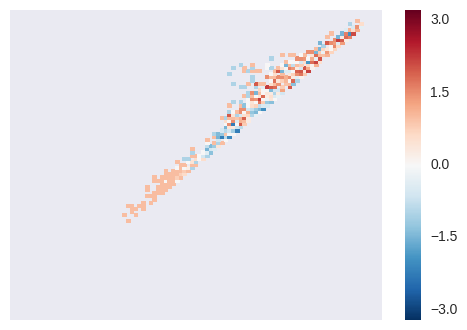

In [16]:
psft = np.flipud(ps.T)
tsft = np.flipud(ts.T)
sns.heatmap(tsft,xticklabels='',yticklabels='',mask=psft<0.05)

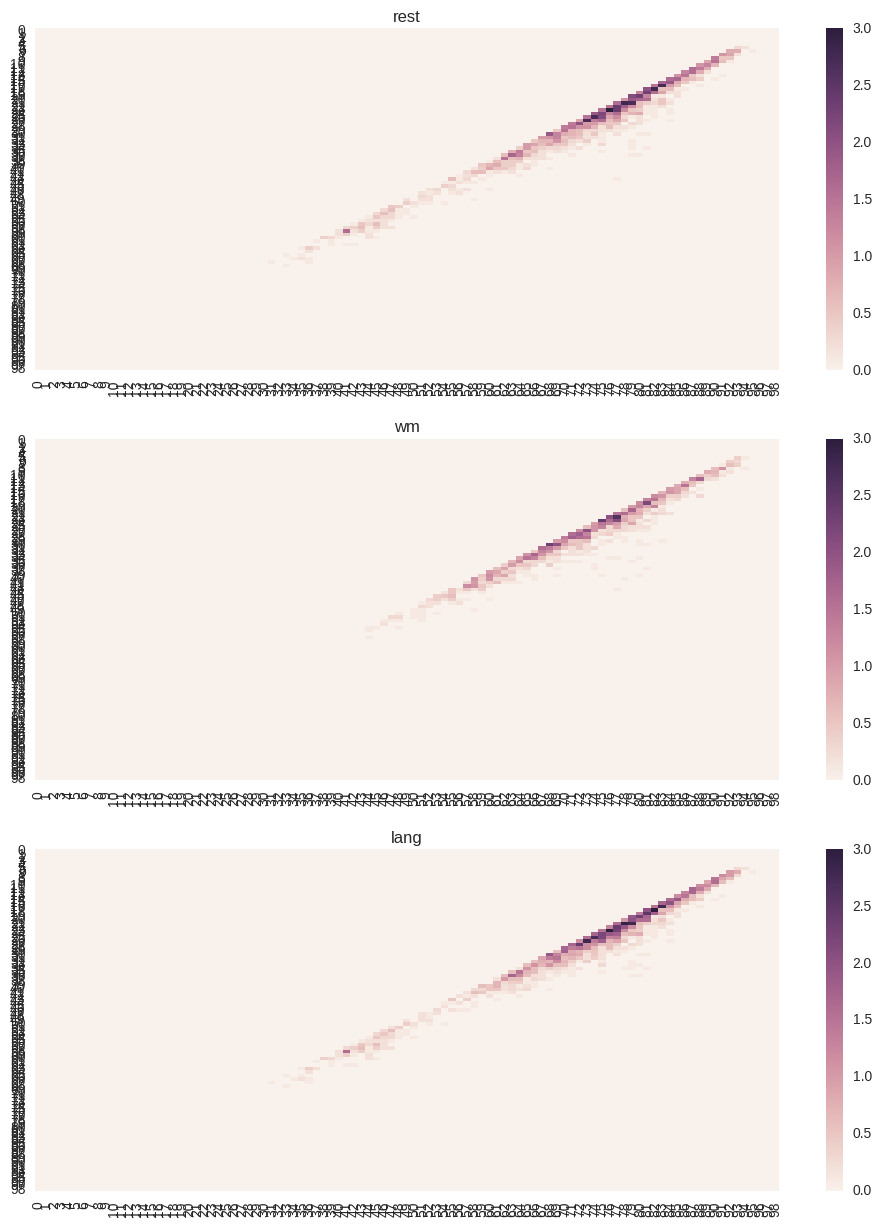

In [17]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(12,15))

a = ax[0]
a.set_title('rest')
sns.heatmap(np.flipud(mn_rest_hists),ax=a,vmin=0,vmax=3)

a = ax[1]
a.set_title('wm')
sns.heatmap(np.flipud(mn_wm_hists),ax=a,vmin=0,vmax=3)

a = ax[2]
a.set_title('lang')
sns.heatmap(np.flipud(mn_lang_hists),ax=a,vmin=0,vmax=3)

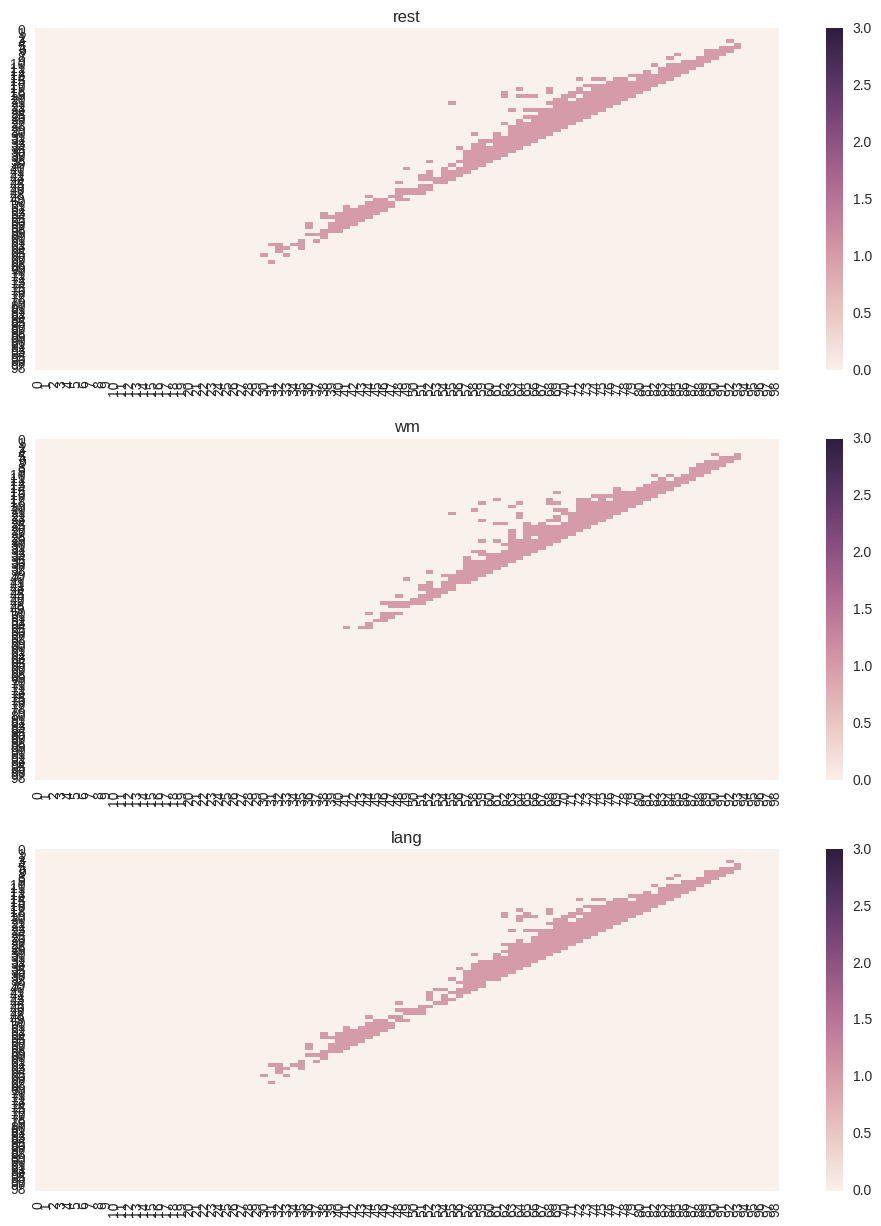

In [18]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(12,15))

a = ax[0]
a.set_title('rest')
sns.heatmap(np.flipud(mn_rest_hists.T>0),ax=a,vmin=0,vmax=3)

a = ax[1]
a.set_title('wm')
sns.heatmap(np.flipud(mn_wm_hists.T>0),ax=a,vmin=0,vmax=3)

a = ax[2]
a.set_title('lang')
sns.heatmap(np.flipud(mn_lang_hists.T>0),ax=a,vmin=0,vmax=3)

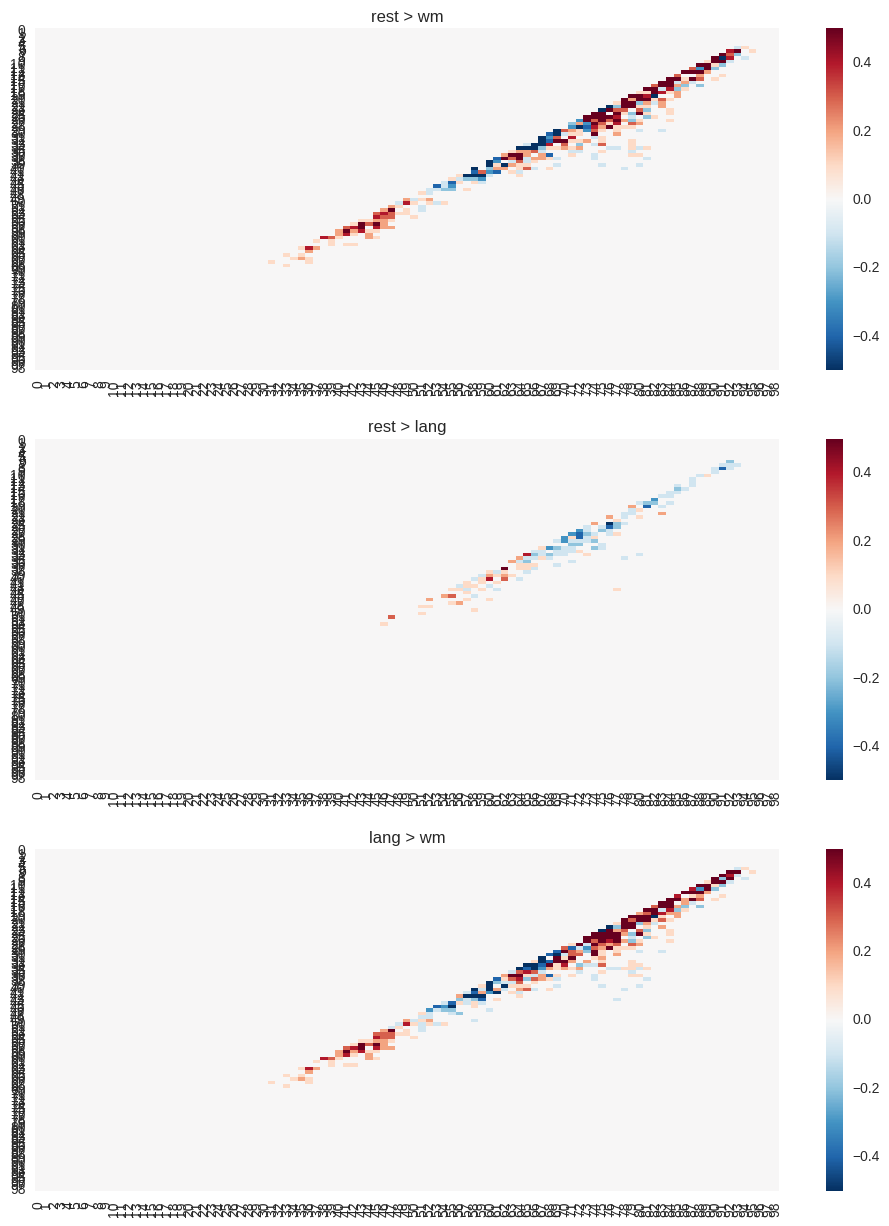

In [19]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(12,15))

a = ax[0]
a.set_title('rest > wm')
sns.heatmap(np.flipud(mn_rest_hists - mn_wm_hists),ax=a,vmin=-0.5,vmax=0.5)

a = ax[1]
a.set_title('rest > lang')
sns.heatmap(np.flipud(mn_rest_hists - mn_lang_hists),ax=a,vmin=-0.5,vmax=0.5)

a = ax[2]
a.set_title('lang > wm')
sns.heatmap(np.flipud(mn_lang_hists - mn_wm_hists),ax=a,vmin=-0.5,vmax=0.5)#,vmin=0,vmax=3)


---